In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('final-dataset.csv')

In [4]:
df.head()

,Unnamed: 0,text,emotion
0,0,i didnt feel humiliated,sadness
1,1,i can go from feeling so hopeless to so damned...,sadness
2,2,im grabbing a minute to post i feel greedy wrong,anger
3,3,i am ever feeling nostalgic about the fireplac...,love
4,4,i am feeling grouchy,anger


In [5]:
df.shape

(27480, 3)

In [8]:
# classes and value counts:
print(df.emotion.value_counts())
print("Number of classes: ",len(df.emotion.value_counts()))
print('Data Size:',df.shape[0])

joy         7845
sadness     6876
anger       3789
fear        3451
love        1641
disgust     1057
guilt       1057
shame       1045
surprise     719
Name: emotion, dtype: int64
Number of classes:  9
Data Size: 27480


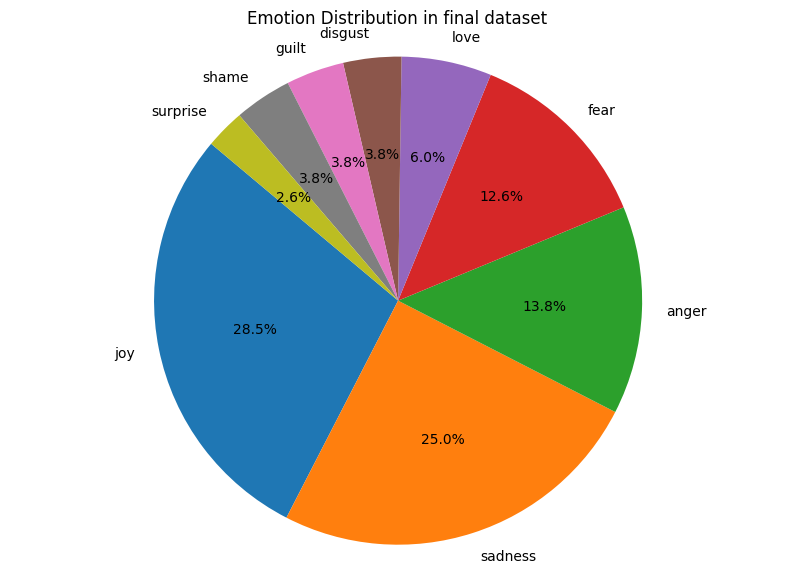

In [11]:
# Getting the emotion counts dynamically
emotion_counts = df['emotion'].value_counts()

# Plotting the pie chart dynamically
plt.figure(figsize=(10, 7))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Emotion Distribution in final dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

# Check for duplicates

In [12]:
duplicates = df.duplicated().sum()
print(f"Total duplicates in the dataset: {duplicates}")

Total duplicates in the dataset: 0


In [13]:
df.duplicated().sum()

0

# SAME TEXT BUT DIFFERENT EMOTIONS

In [17]:
# Now, we'll check for texts that have different emotions
# Grouping by text and filtering out those with more than one unique emotion
grouped = df.groupby('text').filter(lambda x: x['emotion'].nunique() > 1)

grouped


,Unnamed: 0,text,emotion
112,112,i feel like some of you have pains and you can...,love
364,364,i tend to stop breathing when i m feeling stre...,sadness
556,556,i feel completely blessed to be a part of this...,love
1372,1372,i loved the feeling i got during an amazing sl...,surprise
1501,1501,i feel on the verge of tears from weariness i ...,love
...,...,...,...
26835,6835,Not doing well in the examn.,guilt
26848,6848,Being insulted in public.,shame
26938,6938,Not doing well in the examn.,shame
26966,6966,Not doing well in the examn.,shame


In [18]:
grouped.head()

,Unnamed: 0,text,emotion
112,112,i feel like some of you have pains and you can...,love
364,364,i tend to stop breathing when i m feeling stre...,sadness
556,556,i feel completely blessed to be a part of this...,love
1372,1372,i loved the feeling i got during an amazing sl...,surprise
1501,1501,i feel on the verge of tears from weariness i ...,love


In [19]:
# First, let's find the indexes of these entries in the original DataFrame
duplicates_detail = df[df['text'].isin(grouped['text'])]

# Sort by text to make it easier to review
duplicates_detail_sorted = duplicates_detail.sort_values(by='text')

# Displaying the detailed list of duplicates including row number (index in the DataFrame)
duplicates_detail_sorted

,Unnamed: 0,text,emotion
26848,6848,Being insulted in public.,shame
26824,6824,Being insulted in public.,anger
20037,37,Friends who torture animals.,anger
20039,39,Friends who torture animals.,disgust
24327,4327,I was watching T.V with my parents and some po...,shame
...,...,...,...
8775,8775,i write these words i feel sweet baby kicks fr...,joy
7685,7685,im still not sure why reilly feels the need to...,surprise
2908,2908,im still not sure why reilly feels the need to...,fear
9596,9596,ive also made it with both sugar measurements ...,joy


# There are 121 rows with duplicate data in total

In [26]:
# To remove both instances of duplicates (not keeping the first), we first identify texts with multiple emotions
# and then remove all instances of these texts.

# Identifying texts with multiple emotions again to ensure consistency in explanation
grouped = df.groupby('text').filter(lambda x: x['emotion'].nunique() > 1)

# Identifying all texts to be removed (those with multiple emotions)
texts_to_remove = grouped['text'].unique()

# Removing all instances of these texts from the original DataFrame
df_removed_all_duplicates = df[~df['text'].isin(texts_to_remove)]

df_removed_all_duplicates.reset_index(drop=True)


,Unnamed: 0,text,emotion
0,0,i didnt feel humiliated,sadness
1,1,i can go from feeling so hopeless to so damned...,sadness
2,2,im grabbing a minute to post i feel greedy wrong,anger
3,3,i am ever feeling nostalgic about the fireplac...,love
4,4,i am feeling grouchy,anger
...,...,...,...
27354,7475,Two years back someone invited me to be the tu...,anger
27355,7476,I had taken the responsibility to do something...,sadness
27356,7477,I was at home and I heard a loud sound of spit...,disgust
27357,7478,I did not do the homework that the teacher had...,shame


In [27]:
df_removed_all_duplicates

,Unnamed: 0,text,emotion
0,0,i didnt feel humiliated,sadness
1,1,i can go from feeling so hopeless to so damned...,sadness
2,2,im grabbing a minute to post i feel greedy wrong,anger
3,3,i am ever feeling nostalgic about the fireplac...,love
4,4,i am feeling grouchy,anger
...,...,...,...
27475,7475,Two years back someone invited me to be the tu...,anger
27476,7476,I had taken the responsibility to do something...,sadness
27477,7477,I was at home and I heard a loud sound of spit...,disgust
27478,7478,I did not do the homework that the teacher had...,shame


In [28]:
27480-27359

121

In [29]:
df_removed_all_duplicates.to_csv('final-dataset-after-removing-duplicates.csv')

In [30]:
# classes and value counts:
print(df_removed_all_duplicates.emotion.value_counts())
print("Number of classes: ",len(df_removed_all_duplicates.emotion.value_counts()))
print('Data Size:',df_removed_all_duplicates.shape[0])

joy         7813
sadness     6865
anger       3776
fear        3436
love        1612
disgust     1055
guilt       1055
shame       1038
surprise     709
Name: emotion, dtype: int64
Number of classes:  9
Data Size: 27359
